## ******************************LIBRARY IMPORTAION***************

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras.models import Sequential,Model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense,Flatten,Dropout,SimpleRNN,LSTM,Input,Reshape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from miceforest import ImputationKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

## ******DATA SET IMPORTATION AND PREPROCESSING FOR FIRST DATASET******

In [2]:
df_als=pd.read_csv('data/train2-alsfrs.csv')
df_sensor=pd.read_csv('data/train2-sensor.csv')
df_static=pd.read_csv('data/train2-static.csv')


In [3]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})
df_als=df_als.drop('source',axis=1)
df_sensor=df_sensor.dropna()
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')
df=merged_df
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape
df1=df.drop([187,188],axis=0)
df1
df=df1
first_=df.iloc[:,:2]
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
187/187 [==============================] - 8s 6ms/step - loss: 0.9698
Epoch 2/100
187/187 [==============================] - 1s 4ms/step - loss: 0.8505
Epoch 3/100
187/187 [==============================] - 1s 5ms/step - loss: 0.7889
Epoch 4/100
187/187 [==============================] - 1s 5ms/step - loss: 0.7491
Epoch 5/100
187/187 [==============================] - 1s 5ms/step - loss: 0.7192
Epoch 6/100
187/187 [==============================] - 1s 6ms/step - loss: 0.6935
Epoch 7/100
187/187 [==============================] - 1s 4ms/step - loss: 0.6719
Epoch 8/100
187/187 [==============================] - 1s 5ms/step - loss: 0.6524
Epoch 9/100
187/187 [==============================] - 1s 5ms/step - loss: 0.6333
Epoch 10/100
187/187 [==============================] - 1s 3ms/step - loss: 0.6172
Epoch 11/100
187/187 [==============================] - 1s 3ms/step - loss: 0.6032
Epoch 12/100
187/187 [==============================] - 1s 3ms/step - loss: 0.5899
Epoch 13/100


In [4]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,beat_to_beat_HTI,beat_to_beat_IALS,...,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
47,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,13.077500,0.333582,...,47.0,24.0,1639.25,142.0,1.0,6.002434,68.278839,66.089363,59.137558,21.067757
123,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,8.708197,0.335146,...,420.0,1450.0,2014.25,3162.0,1.0,-0.929001,49.087624,96.693390,81.194710,26.965446
194,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,21.020000,0.333333,...,1524.0,1482.0,2159.25,3685.0,1.0,-0.929001,49.087624,96.693390,81.194710,26.965446
285,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,12.168342,0.333830,...,16.0,88.0,1780.25,104.0,1.0,8.786141,77.022079,54.529011,57.990910,20.871243
408,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,10.567308,0.333563,...,0.0,20.0,1740.25,20.0,1.0,8.786141,77.022079,54.529011,57.990910,20.871243


In [5]:
df = pd.concat([first_,imputed_df, y], axis=1)
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')
merged=merged_df.dropna(subset='Q1')
merged
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)
first_df=df
first_df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9c810836,8663,362.0,1666.0,49.884070,0.500793,0.498714,0.502324,0.498717,49.908595,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
7034,9c810836,8782,453.0,1641.0,49.889924,0.501280,0.499207,0.502324,0.499513,49.867981,...,4.0,3.0,3.0,3.0,4.0,4.0,1.0,4.0,4.0,4.0
7035,df4c99f5,8658,143.0,1555.0,50.240456,0.497943,0.502723,0.496948,0.503052,50.228331,...,4.0,3.0,1.0,1.0,1.0,2.0,0.0,4.0,4.0,4.0
7036,9cb5cd37,97,316.0,1666.0,50.062887,0.505737,0.495804,0.504997,0.495772,50.041176,...,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


## ******DATA SET IMPORTATION AND PREPROCESSING FOR SECOND DATASET******

In [6]:
df_als=pd.read_csv('data/train-alsfrs.csv')
df_sensor=pd.read_csv('data/train-sensor.csv')
df_static=pd.read_csv('data/train-static.csv')

In [7]:
df_als= df_als.rename(columns={'patient_id':'id','days_from_diagnosis': 'days'})
df_sensor = df_sensor.rename(columns={'patient_id':'id','measure_days_from_diagnosis': 'days'})
df_static = df_static.rename(columns={'patient_id':'id'})


In [8]:
df_als
df_als=df_als.drop('source',axis=1)
df_als

,id,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,829,3,4,4,3,1,2,3,2,1,1,0,2
1,fd228ba0,863,3,4,4,3,1,2,3,2,1,1,0,2
2,fd228ba0,941,3,4,4,2,1,2,3,1,0,1,0,2
3,fd228ba0,974,3,4,4,3,1,2,3,1,0,1,0,2
4,fd228ba0,1007,3,4,4,2,1,1,3,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,5f4c8750,1203,3,4,4,3,4,3,3,2,2,2,4,4
297,c0d49276,103,4,4,4,4,4,4,4,2,3,4,4,4
298,c0d49276,135,4,4,4,4,4,2,3,2,1,4,4,4
299,c0d49276,167,4,4,4,4,4,2,3,2,1,4,4,4


In [9]:
df_sensor

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,spo2_P,spo2_POD,spo2_RG,spo2_SD,spo2_ZC,steps_12_am-6_am,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps
0,fd228ba0,800,7.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,50.0,1638.25,82.0
1,fd228ba0,801,6.0,1631.0,NaN,NaN,NaN,NaN,NaN,NaN,...,81.666667,0.269737,15.666667,2.943160,27.0,26.0,0.0,121.0,1637.25,147.0
2,fd228ba0,802,NaN,NaN,49.999707,0.492208,0.507792,0.492233,0.507767,50.000000,...,84.333333,0.405738,13.666667,3.055109,8.0,NaN,NaN,NaN,NaN,NaN
3,fd228ba0,803,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,83.666667,0.446494,16.166667,3.814763,18.0,0.0,13.0,67.0,1665.25,121.0
4,fd228ba0,804,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,84.753333,0.000000,7.333333,2.338218,1.0,28.0,0.0,111.0,1638.25,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,c0d49276,103,84.0,1731.0,49.834021,0.495811,0.504189,0.495786,0.504214,49.854366,...,84.000000,0.592255,16.000000,2.784654,44.0,0.0,86.0,138.0,1815.25,264.0
13942,c0d49276,104,18.0,1731.0,50.179489,0.517709,0.482291,0.517311,0.482689,50.157936,...,82.526667,0.225806,17.333333,4.093733,6.0,0.0,11.0,82.0,1749.25,125.0
13943,c0d49276,105,153.0,1731.0,49.533121,0.504001,0.495999,0.504016,0.495984,49.542399,...,86.000000,0.327731,13.000000,2.819238,14.0,0.0,103.0,117.0,1884.25,249.0
13944,c0d49276,106,98.0,1731.0,50.128646,0.495741,0.504259,0.495807,0.504193,50.147842,...,85.666667,0.297376,17.000000,3.148154,21.0,0.0,280.0,68.0,1829.25,414.0


In [10]:
df_sensor.duplicated().sum()

0

## ***************DATA PREPROCESSING AND EXPLORATION***************

In [11]:
df_sensor=df_sensor.dropna()
df_sensor

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,spo2_P,spo2_POD,spo2_RG,spo2_SD,spo2_ZC,steps_12_am-6_am,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps
3,fd228ba0,803,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,83.666667,0.446494,16.166667,3.814763,18.0,0.0,13.0,67.0,1665.25,121.0
4,fd228ba0,804,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,84.753333,0.000000,7.333333,2.338218,1.0,28.0,0.0,111.0,1638.25,139.0
24,fd228ba0,829,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,83.865000,0.364198,13.000000,3.495643,18.0,0.0,11.0,29.0,1662.25,40.0
27,fd228ba0,832,110.0,1631.0,49.889215,0.470498,0.529502,0.470705,0.529295,49.890583,...,81.666667,0.411429,11.666667,2.996364,3.0,0.0,128.0,100.0,1741.25,255.0
40,fd228ba0,845,745.0,1631.0,49.853449,0.492547,0.507453,0.492588,0.507412,49.828971,...,84.333333,0.371429,11.666667,1.961777,64.0,0.0,0.0,77.0,2376.25,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,c0d49276,101,509.0,1731.0,49.858902,0.521072,0.478928,0.520998,0.479002,49.871755,...,86.446667,0.231850,12.666667,1.900667,6.0,0.0,219.0,320.0,2240.25,703.0
13940,c0d49276,102,210.0,1731.0,50.401398,0.475749,0.524251,0.475763,0.524237,50.356177,...,89.256667,0.050420,11.666667,1.605275,10.0,0.0,34.0,496.0,1941.25,609.0
13941,c0d49276,103,84.0,1731.0,49.834021,0.495811,0.504189,0.495786,0.504214,49.854366,...,84.000000,0.592255,16.000000,2.784654,44.0,0.0,86.0,138.0,1815.25,264.0
13942,c0d49276,104,18.0,1731.0,50.179489,0.517709,0.482291,0.517311,0.482689,50.157936,...,82.526667,0.225806,17.333333,4.093733,6.0,0.0,11.0,82.0,1749.25,125.0


In [12]:
df_static

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
0,fd228ba0,M,2.002740,63,44.0,60.0,21.513859
1,c53a1583,M,0.000000,38,82.0,86.0,26.543210
2,fbeebbbb,M,21.180822,48,49.0,64.0,21.138856
3,0615d2f8,F,1.002740,67,73.0,66.0,27.120316
4,892d81f6,F,2.416438,49,100.0,70.0,28.040378
5,9d0b55d0,M,0.410959,28,84.0,85.0,28.400548
6,025f1df9,M,0.328767,58,96.0,79.0,27.660096
7,88b5b1aa,M,0.498630,58,94.0,69.0,24.447279
8,72c46573,M,0.252055,53,90.0,69.0,23.875433
9,527bc702,M,0.915068,64,95.0,77.0,26.027582


In [13]:
merged_df = pd.merge( df_static,df_als, on=['id'], how='outer')

## LABEL ENCODING CATEGORICAL DATA

In [14]:
df=merged_df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.shape

(302, 20)

In [15]:
df.columns.get_loc('Q1')

8

## Removing inappropriate Gender

In [16]:
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
299,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,186.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0
300,479620e5,2,NaN,NaN,NaN,NaN,NaN,913.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,1.0,1.0,4.0,4.0,2.0


In [17]:
df1=df.drop([300,301],axis=0)
df1

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.002740,63.0,44.0,60.0,21.513859,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,0.167123,44.0,85.0,62.0,23.918830,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.038356,46.0,NaN,NaN,NaN,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [18]:
df=df1

In [19]:
first_=df.iloc[:,:2]
first_

,id,sex
0,fd228ba0,1
1,fd228ba0,1
2,fd228ba0,1
3,fd228ba0,1
4,fd228ba0,1
...,...,...
295,5f4c8750,0
296,c0d49276,1
297,c0d49276,1
298,c0d49276,1


## Handling missing values using Autoencoders

In [20]:
X=df.iloc[:,2:7]
y=df.iloc[:,7:]
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[np.isnan(X_normalized)] = 0
input_layer = Input(shape=(X_normalized.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)
decoded = Dense(X_normalized.shape[1], activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_normalized, X_normalized,epochs=100,batch_size=1)
imputed_data = autoencoder.predict(X_normalized)
imputed_data = scaler.inverse_transform(imputed_data)
imputed_df = pd.DataFrame(imputed_data, columns=X.columns)

Epoch 1/100
300/300 [==============================] - 3s 2ms/step - loss: 1.1748
Epoch 2/100
300/300 [==============================] - 1s 3ms/step - loss: 0.9413
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8580
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8128
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7722
Epoch 6/100
300/300 [==============================] - 1s 3ms/step - loss: 0.7304
Epoch 7/100
300/300 [==============================] - 1s 2ms/step - loss: 0.6881
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 0.6419
Epoch 9/100
300/300 [==============================] - 1s 2ms/step - loss: 0.5962
Epoch 10/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5584
Epoch 11/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5308
Epoch 12/100
300/300 [==============================] - 1s 3ms/step - loss: 0.5108
Epoch 13/100


In [21]:
df = pd.concat([first_,imputed_df, y], axis=1)
df

,id,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi,days,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,1,2.595538,69.213036,71.335213,56.007683,20.583040,829.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
1,fd228ba0,1,2.595538,69.213036,71.335213,56.007683,20.583040,863.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
2,fd228ba0,1,2.595538,69.213036,71.335213,56.007683,20.583040,941.0,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
3,fd228ba0,1,2.595538,69.213036,71.335213,56.007683,20.583040,974.0,3.0,4.0,4.0,3.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
4,fd228ba0,1,2.595538,69.213036,71.335213,56.007683,20.583040,1007.0,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f4c8750,0,1.531211,43.773727,86.644478,66.120560,23.174467,1203.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
296,c0d49276,1,1.215243,46.883686,88.151184,72.913330,25.020210,103.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0
297,c0d49276,1,1.215243,46.883686,88.151184,72.913330,25.020210,135.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
298,c0d49276,1,1.215243,46.883686,88.151184,72.913330,25.020210,167.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [22]:
merged_df = pd.merge( df_sensor,df, on=['id','days'], how='outer')

In [23]:
merged_df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,fd228ba0,803.0,34.0,1631.0,49.726549,0.485366,0.514634,0.485469,0.514531,49.713790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fd228ba0,804.0,7.0,1631.0,50.571503,0.490403,0.509597,0.490584,0.509416,50.648942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
3,fd228ba0,832.0,110.0,1631.0,49.889215,0.470498,0.529502,0.470705,0.529295,49.890583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fd228ba0,845.0,745.0,1631.0,49.853449,0.492547,0.507453,0.492588,0.507412,49.828971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [24]:
merged=merged_df.dropna(subset='Q1')
merged

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
9,fd228ba0,863.0,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
37,fd228ba0,941.0,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
50,fd228ba0,1007.0,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
87,fd228ba0,1252.0,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [25]:
print(merged.columns.get_loc('Q1'))

98


## ***************MISSING VALUES HANDLING USING MULTIPLE IMPORTATION***************

In [26]:
x_data=merged.iloc[:,2:98]
mk=ImputationKernel(data=x_data,save_all_iterations=True,random_state=0)
mk.mice(2)
m_data=mk.complete_data()
m_data.head()

,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,beat_to_beat_HTI,beat_to_beat_IALS,...,steps_12_pm-6_pm,steps_6_am-12_pm,total_calories,total_steps,sex,diagnostic_delay,age_at_diagnosis,FVC,weight,bmi
2,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,9.777589,0.333333,...,11.0,29.0,1662.25,40.0,1.0,2.595538,69.213036,71.335213,56.007683,20.58304
9,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,11.729124,0.333333,...,0.0,74.0,2173.25,339.0,1.0,2.595538,69.213036,71.335213,56.007683,20.58304
37,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,14.856000,0.333571,...,39.0,13.0,1729.25,278.0,1.0,2.595538,69.213036,71.335213,56.007683,20.58304
50,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,21.814394,0.333333,...,23.0,7.0,1650.25,54.0,1.0,2.595538,69.213036,71.335213,56.007683,20.58304
87,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,16.195804,0.333604,...,32.0,15.0,1628.25,136.0,1.0,2.595538,69.213036,71.335213,56.007683,20.58304


In [27]:
first_=merged.iloc[:,:2]
y=merged.iloc[:,98:]
df = pd.concat([first_,m_data, y], axis=1)
df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
2,fd228ba0,829.0,31.0,1631.0,50.167812,0.511818,0.488182,0.511649,0.488351,50.157369,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
9,fd228ba0,863.0,542.0,1631.0,49.392646,0.488480,0.511520,0.488487,0.511513,49.343856,...,4.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0,2.0
37,fd228ba0,941.0,98.0,1631.0,49.981590,0.494000,0.506000,0.493998,0.506002,49.979293,...,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
50,fd228ba0,1007.0,19.0,1631.0,49.970202,0.493233,0.506767,0.493385,0.506615,49.975954,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,2.0
87,fd228ba0,1252.0,2.0,1626.0,49.502554,0.496053,0.503947,0.496091,0.503909,49.471023,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,159.0,1525.0,49.834021,0.499937,0.500063,0.499826,0.499495,49.854366,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,53.0,1465.0,49.931995,0.494458,0.505215,0.494288,0.505167,49.956527,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,1716.0,1716.0,49.969906,0.492563,0.507437,0.492273,0.507150,49.932335,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,134.0,1706.0,49.726295,0.497905,0.502564,0.497540,0.502312,49.737379,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [28]:
second_df=df
df=pd.concat([first_df,second_df])
df

,id,days,active_calories,basal_calories,beat_to_beat_AI,beat_to_beat_C2a,beat_to_beat_C2d,beat_to_beat_Ca,beat_to_beat_Cd,beat_to_beat_GI,...,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,fd228ba0,993.0,8.0,1631.0,50.098586,0.504301,0.495699,0.504289,0.495711,50.104065,...,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,c53a1583,87.0,248.0,1766.0,50.712582,0.490730,0.509270,0.490447,0.509553,50.631210,...,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,c53a1583,266.0,393.0,1766.0,50.076650,0.497943,0.502057,0.497971,0.502029,50.081903,...,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,fbeebbbb,775.0,69.0,1711.0,50.313692,0.486101,0.513899,0.486165,0.513835,50.285924,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,fbeebbbb,929.0,29.0,1711.0,50.240456,0.478673,0.521327,0.478634,0.521366,50.207117,...,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,df4c99f5,8658.0,159.0,1525.0,49.834021,0.499937,0.500063,0.499826,0.499495,49.854366,...,3.0,3.0,1.0,1.0,2.0,2.0,0.0,2.0,3.0,4.0
7069,df4c99f5,8762.0,53.0,1465.0,49.931995,0.494458,0.505215,0.494288,0.505167,49.956527,...,3.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,4.0
7070,c0d49276,135.0,1716.0,1716.0,49.969906,0.492563,0.507437,0.492273,0.507150,49.932335,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0
7071,c0d49276,167.0,134.0,1706.0,49.726295,0.497905,0.502564,0.497540,0.502312,49.737379,...,4.0,4.0,4.0,2.0,3.0,2.0,1.0,4.0,4.0,4.0


In [29]:
df=df.drop(['id'],axis=1)

# Data samples creation

In [30]:
def bootstrap_sample(sample, n_samples=None):
    if n_samples is None:
        n_samples = len(sample)
    indices = np.random.choice(len(sample), size=n_samples, replace=True)
    return sample[indices]

df2=df
s=df2.columns
df2=np.array(df2)
df2 = bootstrap_sample(df2, n_samples=1000)
df2=pd.DataFrame(df2,columns=s)
df=pd.concat([df,df2])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486 entries, 47 to 999
Columns: 109 entries, days to Q12
dtypes: float64(109)
memory usage: 1.2 MB


In [32]:
df.isnull().sum().max()

0

## ******************************DATA SPLITTING***************

In [33]:
x1 = df.iloc[:,:97]
y = df.iloc[:,97:]

In [34]:
x1.shape

(1486, 97)

## ***************FEATURE SELECTION***************

['age_at_diagnosis', 'days', 'weight', 'bmi', 'FVC', 'basal_calories', 'diagnostic_delay', 'steps_6_am-12_pm', 'total_steps', 'beat_to_beat_cvi', 'steps_12_pm-6_pm', 'total_calories', 'heart_rate_r2', 'beat_to_beat_pNN50', 'beat_to_beat_meanNN', 'active_calories', 'heart_rate_mean', 'heart_rate_max_time', 'spo2_SD', 'beat_to_beat_SD1a', 'respiration_DFA_alpha2', 'respiration_ApEn', 'respiration_alpha1_ExpRange', 'spo2_M', 'spo2_ZC', 'spo2_AV', 'respiration_SD2SD1', 'beat_to_beat_sdNNI5', 'beat_to_beat_medianNN', 'heart_rate_baseline', 'spo2_CA', 'beat_to_beat_PI', 'heart_rate_linear_trend', 'respiration_alpha1_DimMean', 'spo2_ODI', 'spo2_CT', 'beat_to_beat_sdNNI2', 'beat_to_beat_PIP', 'beat_to_beat_sdNNI1', 'spo2_Min', 'beat_to_beat_HTI', 'heart_rate_std', 'beat_to_beat_hcvNN', 'spo2_MED', 'heart_rate_min_time', 'beat_to_beat_csi_modified', 'spo2_AOD100', 'respiration_SampEn', 'spo2_P', 'respiration_alpha1_ExpMean']


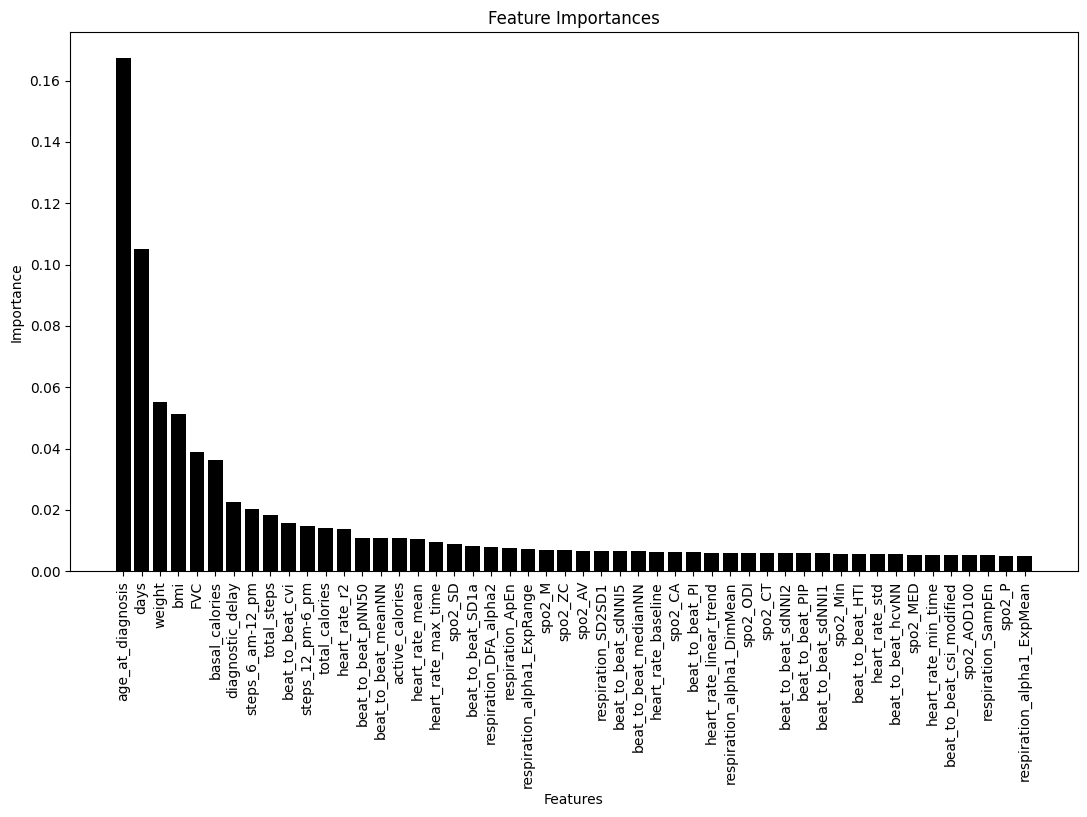

In [35]:
rf = RandomForestRegressor()
rf.fit(x1,y)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x1.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
ifs=importance_df['Feature'][:50]
selected_columns = list(ifs)
print(selected_columns)

plt.figure(figsize=(13,7))
plt.bar(ifs, importance_df['Importance'][:50], color='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [36]:
x=x1[['age_at_diagnosis', 'steps_12_pm-6_pm', 'days', 'FVC', 'diagnostic_delay', 'weight', 'bmi', 'total_steps', 'steps_6_am-12_pm', 'total_calories', 'beat_to_beat_meanNN', 'respiration_SD2', 'basal_calories', 'heart_rate_baseline', 'spo2_M', 'respiration_SDBB', 'respiration_SampEn', 'active_calories', 'beat_to_beat_pNN50', 'beat_to_beat_PI', 'beat_to_beat_medianNN', 'beat_to_beat_cvi', 'heart_rate_min_time', 'beat_to_beat_sdNNI5', 'beat_to_beat_SD1a', 'heart_rate_r2', 'respiration_DFA_alpha2', 'beat_to_beat_sdNNI1', 'respiration_DFA_alpha1', 'spo2_AV', 'beat_to_beat_HTI', 'respiration_alpha1_ExpMean', 'beat_to_beat_GI', 'beat_to_beat_sd1sd2', 'spo2_MED', 'heart_rate_std', 'spo2_CT', 'spo2_P', 'heart_rate_mean', 'spo2_ODI', 'respiration_alpha2_DimMean', 'steps_12_am-6_am', 'beat_to_beat_iqrNN', 'respiration_alpha1_DimMean', 'beat_to_beat_sdNNI2', 'beat_to_beat_hcvNN', 'respiration_alpha1_DimRange', 'spo2_DI', 'beat_to_beat_madNN', 'heart_rate_linear_trend']]
x


,age_at_diagnosis,steps_12_pm-6_pm,days,FVC,diagnostic_delay,weight,bmi,total_steps,steps_6_am-12_pm,total_calories,...,respiration_alpha2_DimMean,steps_12_am-6_am,beat_to_beat_iqrNN,respiration_alpha1_DimMean,beat_to_beat_sdNNI2,beat_to_beat_hcvNN,respiration_alpha1_DimRange,spo2_DI,beat_to_beat_madNN,heart_rate_linear_trend
47,68.278839,47.0,993.0,66.089363,6.002434,59.137558,21.067757,142.0,24.0,1639.25,...,0.590042,0.0,106.048704,0.513550,5.615844,14.443423,0.754727,3.037037,42.441819,0.000122
123,49.087624,420.0,87.0,96.693390,-0.929001,81.194710,26.965446,3162.0,1450.0,2014.25,...,1.094878,121.0,163.781872,0.679280,7.725425,18.800256,1.461821,1.111996,65.384615,0.000335
194,49.087624,1524.0,266.0,96.693390,-0.929001,81.194710,26.965446,3685.0,1482.0,2159.25,...,1.235936,679.0,137.299771,0.773600,7.265157,19.869919,1.173593,0.824116,65.040650,0.000309
285,77.022079,16.0,775.0,54.529011,8.786141,57.990910,20.871243,104.0,88.0,1780.25,...,1.923220,0.0,67.758329,0.814478,5.442660,12.937527,1.016805,2.423528,35.121328,-0.000011
408,77.022079,0.0,929.0,54.529011,8.786141,57.990910,20.871243,20.0,20.0,1740.25,...,1.707067,0.0,64.512976,0.817159,4.316307,13.015741,0.899396,1.401107,33.236394,0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43.773727,590.0,1203.0,86.644478,1.531211,66.120560,23.174467,941.0,308.0,1757.25,...,1.814453,0.0,88.554561,0.648717,5.805381,15.628215,1.241529,2.157930,40.824872,0.000149
996,50.876671,2824.0,514.0,93.460312,-0.223141,77.718163,26.018316,7219.0,2305.0,1757.25,...,1.753244,15.0,231.640357,0.563019,9.062525,28.372457,1.076861,1.282562,120.328703,0.000209
997,69.213036,39.0,941.0,71.335213,2.595538,56.007683,20.583040,278.0,13.0,1729.25,...,0.325430,48.0,113.363106,0.426848,5.505872,25.534815,0.489964,1.315387,59.259259,0.000155
998,65.848137,2893.0,1501.0,66.589203,5.654777,49.314884,18.285345,7238.0,2305.0,2170.25,...,1.896171,15.0,131.638164,0.562532,6.543435,25.237654,1.276429,0.824116,65.040650,0.000155


In [37]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
sc = StandardScaler()
x = sc.fit_transform(x)

In [38]:
y

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
47,3.0,4.0,4.0,2.0,1.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
123,4.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
194,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,1.0,4.0,4.0,4.0
285,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
408,4.0,4.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,4.0,4.0
996,0.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,4.0
997,3.0,4.0,4.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0
998,4.0,4.0,4.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0


## ***************SPLITTING INTO TRAINING AND TESTING /MODEL DEVELOPMENT**************

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.1,random_state=42)

## MLP MODEL

In [40]:
mlp_model=Sequential()
mlp_model.add(Dense(124,activation='relu',input_shape=(50,)))
mlp_model.add(Dense(64,activation='relu'))
mlp_model.add(Dense(64,activation='relu'))
mlp_model.add(Dense(32,activation='relu'))
mlp_model.add(Dropout(0.2))
mlp_model.add(Dense(12, activation='linear'))
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 124)               6324      
                                                                 
 dense_5 (Dense)             (None, 64)                8000      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 12)                396       
                                                                 
Total params: 20,960
Trainable params: 20,960
Non-traina

In [41]:
mlp_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
mlp_his=mlp_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
mlp_pred=mlp_model.predict(x_test)
mlp_pred=np.round((np.clip(mlp_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 5s 22ms/step - loss: 6.1187 - mean_absolute_error: 2.1098 - val_loss: 2.1513 - val_mean_absolute_error: 1.2376
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 2.3694 - mean_absolute_error: 1.2557 - val_loss: 1.2158 - val_mean_absolute_error: 0.9024
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 1.7404 - mean_absolute_error: 1.0679 - val_loss: 1.0200 - val_mean_absolute_error: 0.8064
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 1.4734 - mean_absolute_error: 0.9774 - val_loss: 0.9365 - val_mean_absolute_error: 0.7705
Epoch 5/100
42/42 [==============================] - 0s 7ms/step - loss: 1.2767 - mean_absolute_error: 0.9063 - val_loss: 0.8374 - val_mean_absolute_error: 0.7034
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 1.1856 - mean_absolute_error: 0.8734 - val_loss: 0.7688 - val_mean_absolute_error: 0.6811
Epoch 7/100
42/42 [==

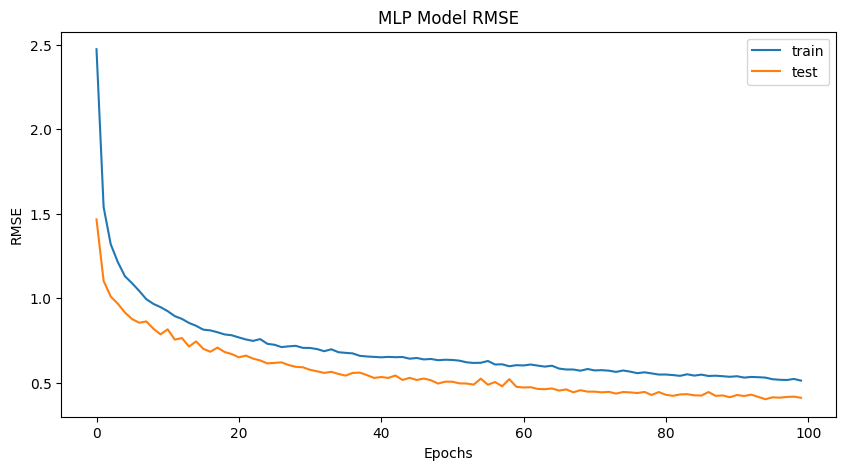

In [42]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(mlp_his.history['loss']))
plt.plot(np.sqrt(mlp_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('MLP Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

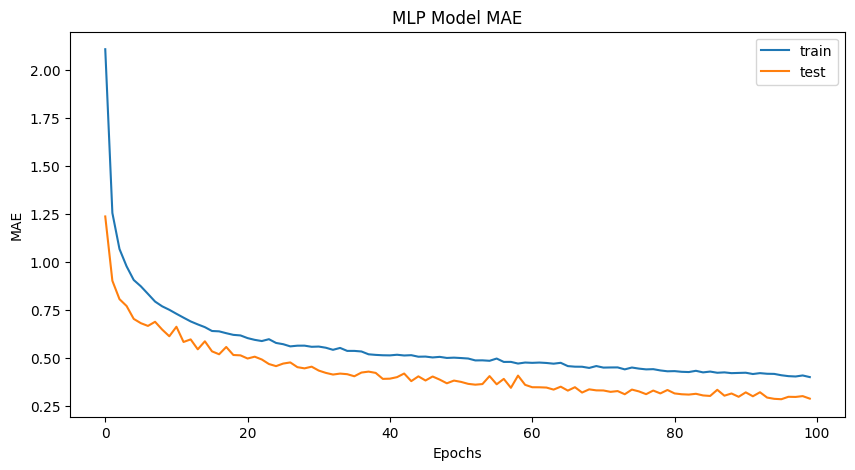

In [43]:
plt.figure(figsize=(10,5))
plt.plot(mlp_his.history['mean_absolute_error'])
plt.plot(mlp_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('MLP Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [44]:
print('MAE for MLP:',mean_absolute_error(mlp_pred,y_test))
print('RMSE for MLP:',np.sqrt(mean_squared_error(mlp_pred,y_test)))
print('R-squared value for MLP:',r2_score(mlp_pred,y_test))

MAE for MLP: 0.1739373601789709
RMSE for MLP: 0.44180330080201147
R-squared value for MLP: 0.7574387398274512


## ANN Feed forward Algorithm

In [45]:
ff_model=Sequential()
ff_model.add(Dense(124,activation='relu',input_shape=(50,)))
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Flatten())
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Flatten())
ff_model.add(Dense(64,activation='relu'))
ff_model.add(Dense(32,activation='relu'))
ff_model.add(Dropout(0.2))
ff_model.add(Dense(12, activation='linear'))
ff_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 124)               6324      
                                                                 
 dense_10 (Dense)            (None, 64)                8000      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)               

In [46]:
ff_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
ff_his=ff_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
ff_pred=ff_model.predict(x_test)
ff_pred=np.round((np.clip(ff_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 6s 20ms/step - loss: 6.4870 - mean_absolute_error: 2.1995 - val_loss: 2.2683 - val_mean_absolute_error: 1.2709
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 2.4904 - mean_absolute_error: 1.2870 - val_loss: 1.2665 - val_mean_absolute_error: 0.9294
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 1.8121 - mean_absolute_error: 1.0875 - val_loss: 1.0766 - val_mean_absolute_error: 0.8476
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 1.5052 - mean_absolute_error: 0.9854 - val_loss: 0.9054 - val_mean_absolute_error: 0.7515
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 1.3656 - mean_absolute_error: 0.9349 - val_loss: 0.8147 - val_mean_absolute_error: 0.7040
Epoch 6/100
42/42 [==============================] - 0s 6ms/step - loss: 1.2020 - mean_absolute_error: 0.8771 - val_loss: 0.7437 - val_mean_absolute_error: 0.6463
Epoch 7/100
42/42 [==

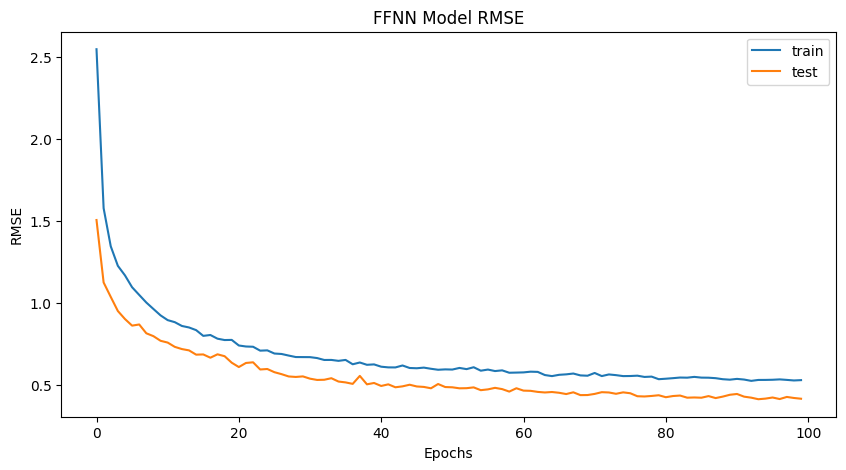

In [47]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(ff_his.history['loss']))
plt.plot(np.sqrt(ff_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('FFNN Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

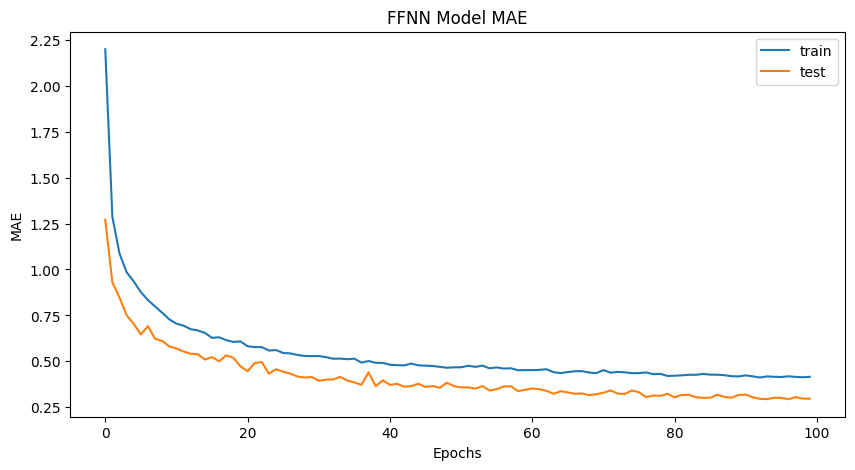

In [48]:
plt.figure(figsize=(10,5))
plt.plot(ff_his.history['mean_absolute_error'])
plt.plot(ff_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('FFNN Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [49]:
print('MAE for FFNN:',mean_absolute_error(ff_pred,y_test))
print('RMSE for FFNN:',np.sqrt(mean_squared_error(ff_pred,y_test)))
print('R-squared value for FFNN:',r2_score(ff_pred,y_test))

MAE for FFNN: 0.1767337807606264
RMSE for FFNN: 0.4499564980215941
R-squared value for FFNN: 0.7409263986981954


In [50]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [51]:
x_train.shape

(1337, 50, 1)

## RNN Model

In [52]:
rnn_model=Sequential()
rnn_model.add(SimpleRNN(128,input_shape=(x_train.shape[1],x_train.shape[2])))
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Flatten())
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Flatten())
rnn_model.add(Dense(64,activation='relu'))
rnn_model.add(Dense(32,activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(12, activation='linear'))

In [53]:
rnn_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
rnn_his=rnn_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
rnn_pred=rnn_model.predict(x_test)
rnn_pred=np.round((np.clip(rnn_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 5s 28ms/step - loss: 5.4192 - mean_absolute_error: 1.9382 - val_loss: 1.8164 - val_mean_absolute_error: 1.0934
Epoch 2/100
42/42 [==============================] - 1s 15ms/step - loss: 2.3189 - mean_absolute_error: 1.2055 - val_loss: 1.1642 - val_mean_absolute_error: 0.8852
Epoch 3/100
42/42 [==============================] - 1s 16ms/step - loss: 1.8097 - mean_absolute_error: 1.0665 - val_loss: 1.0357 - val_mean_absolute_error: 0.7772
Epoch 4/100
42/42 [==============================] - 1s 15ms/step - loss: 1.6357 - mean_absolute_error: 1.0149 - val_loss: 1.0143 - val_mean_absolute_error: 0.8128
Epoch 5/100
42/42 [==============================] - 1s 16ms/step - loss: 1.5262 - mean_absolute_error: 0.9742 - val_loss: 1.1415 - val_mean_absolute_error: 0.8420
Epoch 6/100
42/42 [==============================] - 1s 18ms/step - loss: 1.4940 - mean_absolute_error: 0.9687 - val_loss: 1.0394 - val_mean_absolute_error: 0.8499
Epoch 7/100
42/4

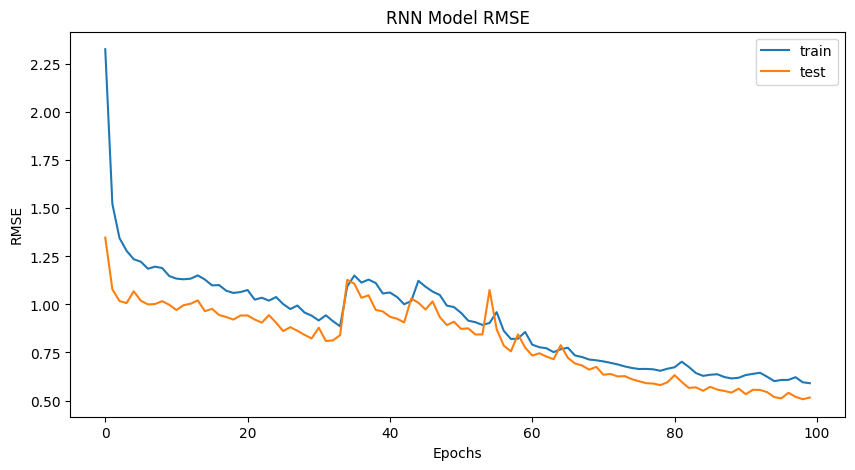

In [54]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(rnn_his.history['loss']))
plt.plot(np.sqrt(rnn_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('RNN Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

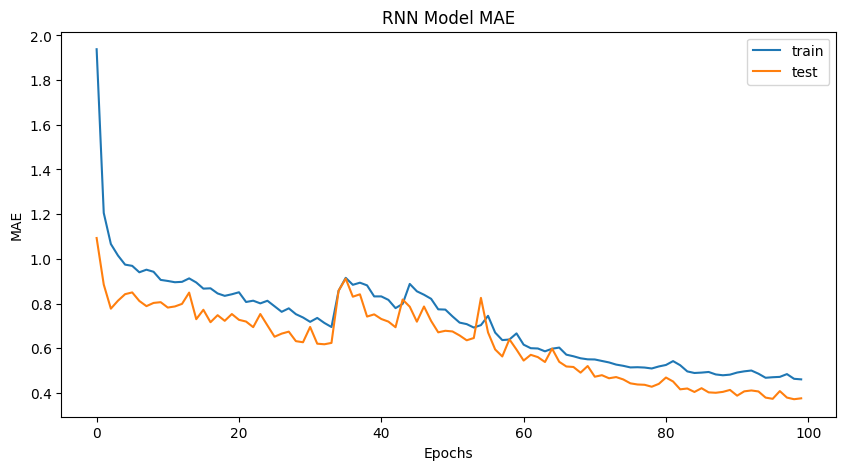

In [55]:
plt.figure(figsize=(10,5))
plt.plot(rnn_his.history['mean_absolute_error'])
plt.plot(rnn_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('RNN Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [56]:
print('MAE for RNN:',mean_absolute_error(rnn_pred,y_test))
print('RMSE for RNN:',np.sqrt(mean_squared_error(rnn_pred,y_test)))
print('R-squared value for RNN:',r2_score(rnn_pred,y_test))

MAE for RNN: 0.2936241610738255
RMSE for RNN: 0.5719975594822859
R-squared value for RNN: 0.5550729213811175


## LSTM Model

In [57]:
lstm_model=Sequential()
lstm_model.add(LSTM(128,input_shape=(x_train.shape[1],x_train.shape[2])))
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Flatten())
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Flatten())
lstm_model.add(Dense(64,activation='relu'))
lstm_model.add(Dense(32,activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(12, activation='linear'))

In [58]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
lstm_his=lstm_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
lstm_pred=lstm_model.predict(x_test)
lstm_pred=np.round((np.clip(lstm_pred,0,4))).astype(int)

Epoch 1/100
42/42 [==============================] - 14s 112ms/step - loss: 5.9936 - mean_absolute_error: 2.0585 - val_loss: 2.0008 - val_mean_absolute_error: 1.1514
Epoch 2/100
42/42 [==============================] - 3s 72ms/step - loss: 2.5460 - mean_absolute_error: 1.2724 - val_loss: 1.5553 - val_mean_absolute_error: 1.0946
Epoch 3/100
42/42 [==============================] - 3s 79ms/step - loss: 2.0364 - mean_absolute_error: 1.1329 - val_loss: 1.2231 - val_mean_absolute_error: 0.9385
Epoch 4/100
42/42 [==============================] - 3s 81ms/step - loss: 1.8289 - mean_absolute_error: 1.0748 - val_loss: 1.1072 - val_mean_absolute_error: 0.8551
Epoch 5/100
42/42 [==============================] - 4s 84ms/step - loss: 1.7695 - mean_absolute_error: 1.0639 - val_loss: 1.0961 - val_mean_absolute_error: 0.8654
Epoch 6/100
42/42 [==============================] - 3s 76ms/step - loss: 1.6574 - mean_absolute_error: 1.0242 - val_loss: 1.1234 - val_mean_absolute_error: 0.8812
Epoch 7/100
42

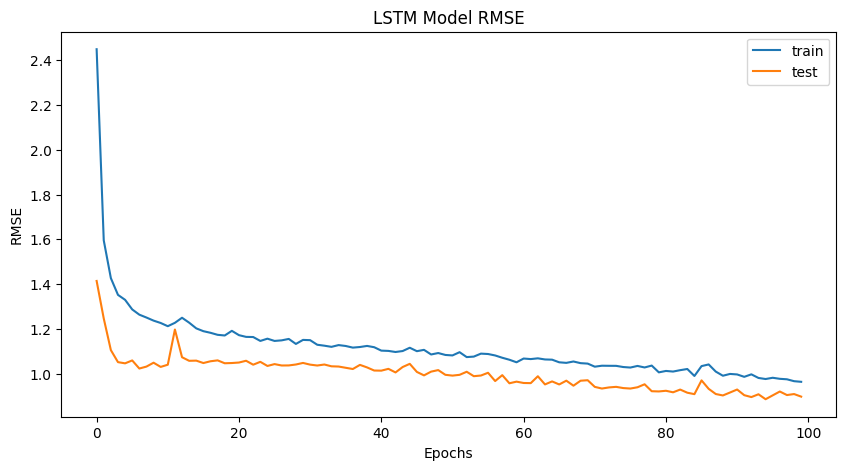

In [59]:
plt.figure(figsize=(10,5))
plt.plot(np.sqrt(lstm_his.history['loss']))
plt.plot(np.sqrt(lstm_his.history['val_loss']))
plt.legend(['train','test'])
plt.title('LSTM Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

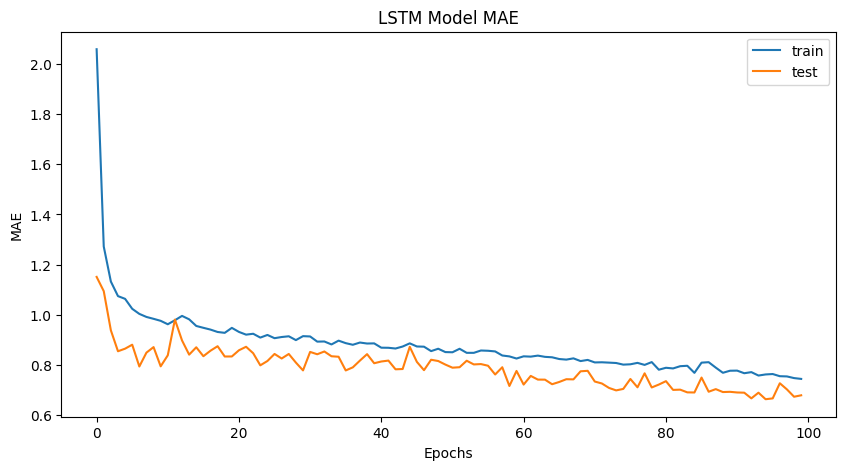

In [60]:
plt.figure(figsize=(10,5))
plt.plot(lstm_his.history['mean_absolute_error'])
plt.plot(lstm_his.history['val_mean_absolute_error'])
plt.legend(['train','test'])
plt.title('LSTM Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.show()

In [61]:
print('MAE for LSTM:',mean_absolute_error(lstm_pred,y_test))
print('RMSE for LSTM:',np.sqrt(mean_squared_error(lstm_pred,y_test)))
print('R-squared value for LSTM:',r2_score(lstm_pred,y_test))

MAE for LSTM: 0.6336689038031319
RMSE for LSTM: 0.9462631083615619
R-squared value for LSTM: -1.5232393997732838


In [62]:
model_names=['MLP','FFNN','RNN','LSTM']
mae_values=[mean_absolute_error(mlp_pred,y_test),mean_absolute_error(ff_pred,y_test),mean_absolute_error(rnn_pred,y_test),mean_absolute_error(lstm_pred,y_test)]
rmse_values=[np.sqrt(mean_squared_error(mlp_pred,y_test)),np.sqrt(mean_squared_error(ff_pred,y_test)),np.sqrt(mean_squared_error(rnn_pred,y_test)),np.sqrt(mean_squared_error(lstm_pred,y_test))]
r2_values=[r2_score(mlp_pred,y_test),r2_score(ff_pred,y_test),r2_score(rnn_pred,y_test),r2_score(lstm_pred,y_test)]
model_scores=pd.DataFrame()
model_scores['Model']=model_names
model_scores['MAE']=mae_values
model_scores['RMSE']=rmse_values
model_scores['R2 score']=r2_values
model_scores


,Model,MAE,RMSE,R2 score
0,MLP,0.173937,0.441803,0.757439
1,FFNN,0.176734,0.449956,0.740926
2,RNN,0.293624,0.571998,0.555073
3,LSTM,0.633669,0.946263,-1.523239
